In [84]:
## Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#
combined_df_matches=pd.read_csv('compas_data_combined_matches.csv')
combined_df_matches.info(), display(combined_df_matches)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     7214 non-null   int64  
 1   FirstName                              7214 non-null   object 
 2   LastName                               7214 non-null   object 
 3   DateOfBirth                            7214 non-null   object 
 4   priors_count                           7214 non-null   float64
 5   age                                    7214 non-null   float64
 6   v_decile_score                         7214 non-null   float64
 7   two_year_recid                         7214 non-null   float64
 8   is_recid                               7214 non-null   float64
 9   juv_fel_count                          7214 non-null   float64
 10  juv_misd_count                         7214 non-null   float64
 11  juv_

,id,FirstName,LastName,DateOfBirth,priors_count,age,v_decile_score,two_year_recid,is_recid,juv_fel_count,...,MaritalStatus_Single,MaritalStatus_Unknown,MaritalStatus_Widowed,DecileScore_Risk of Failure to Appear,DecileScore_Risk of Recidivism,DecileScore_Risk of Violence,RawScore_Risk of Failure to Appear,RawScore_Risk of Recidivism,RawScore_Risk of Violence,_merge
0,1,miguel,hernandez,1947-04-18,0.0,69.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,3,kevon,dixon,1982-01-22,0.0,34.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,6.0,3.0,1.0,25.0,-0.76,-3.07,both
2,4,ed,philo,1991-05-14,4.0,24.0,3.0,1.0,1.0,0.0,...,1.0,0.0,0.0,7.0,4.0,3.0,26.0,-0.66,-2.26,both
3,5,marcu,brown,1993-01-21,1.0,23.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,8.0,6.0,19.0,0.16,-1.59,both
4,6,bouthy,pierrelouis,1973-01-22,2.0,43.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven,butler,1992-07-17,0.0,23.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,7.0,5.0,14.0,0.05,-1.86,both
7210,10997,malcolm,simmons,1993-03-25,0.0,23.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,5.0,15.0,-0.79,-1.90,both
7211,10999,winston,gregory,1958-10-01,0.0,57.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7212,11000,farrah,jean,1982-11-17,3.0,33.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,2.0,11.0,-1.50,-2.92,both


(None, None)

In [85]:
#combined_df_matches.loc[combined_df_matches.Language_English.isna()==True]._merge
combined_df_matches=combined_df_matches.loc[combined_df_matches._merge=='both']

In [106]:
two_year_recid=combined_df_matches.two_year_recid
is_recid=combined_df_matches.is_recid
drop = ['LastName','FirstName','id','DateOfBirth','two_year_recid',
        'is_recid','_merge','Other','Female','above_45','race','sex']
combined_df_matches_cleaned = combined_df_matches.drop(columns=drop)
combined_df_matches_cleaned.isnull().sum()

priors_count                              0
age                                       0
v_decile_score                            0
juv_fel_count                             0
juv_misd_count                            0
juv_other_count                           0
c_charge_desc                            17
below_25                                  0
is_felon                                  0
is_misdemeanor                            0
Male                                      0
African-American                          0
Asian                                     0
Caucasian                                 0
Hispanic                                  0
Native American                           0
Language_English                          0
Language_Spanish                          0
MaritalStatus_Divorced                    0
MaritalStatus_Married                     0
MaritalStatus_Separated                   0
MaritalStatus_Significant Other           0
MaritalStatus_Single            

In [108]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
summarize , poly)

combined_df_matches_cleaned.loc[combined_df_matches_cleaned.c_charge_desc.isna()==True]
c=combined_df_matches_cleaned.copy()
c['miss']=np.where(c.c_charge_desc==np.NaN,1,0)
c=c.drop(columns=['c_charge_desc'])

glm = sm.GLM(is_recid, c,family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
priors_count,0.1488,0.012,12.647,0.000
age,-0.0579,0.010,-5.895,0.000
v_decile_score,0.0192,0.185,0.103,0.918
juv_fel_count,0.0732,0.092,0.795,0.426
juv_misd_count,-0.0605,0.079,-0.765,0.445
juv_other_count,0.1272,0.067,1.895,0.058
below_25,0.0835,0.102,0.819,0.413
is_felon,0.0792,0.482,0.164,0.870
is_misdemeanor,0.0002,0.483,0.000,1.000
Male,0.3243,0.103,3.161,0.002


In [50]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn import metrics
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
X_train, X_test, y_train, y_test=train_test_split(combined_df_matches_cleaned,
                                                  is_recid,
                                                  test_size=0.33,
                                                  random_state=0)
clf=RF(random_state=0)
lamb=np.arange(1,round(combined_df_matches_cleaned.shape[1]/2))
GCV=GridSearchCV(clf,param_grid={'max_features':lamb},
                 scoring='accuracy',cv=5)
GCV.fit(X_train,y_train)
max_feats=GCV.best_params_['max_features']
max_feats

7

In [51]:
clf=RF(max_features=max_feats,random_state=0)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
cvscore=cross_val_score(clf,X_test,y_test,cv=10)
score,cvscore

(0.6546847377725398,
 array([0.67647059, 0.65882353, 0.65882353, 0.61176471, 0.64705882,
        0.55294118, 0.62941176, 0.62721893, 0.68047337, 0.6035503 ]))

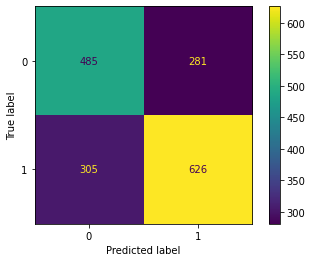

In [52]:
preds=clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,preds)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                          display_labels = [0, 1])
cm_display.plot()

In [53]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier


class WCRF:
    def __init__(self, n_trees=100, s=2, gamma=1, labda=1, tree_max_depth=None, combination=1, data_name=None, random_state=None):
        # build a random forest using sklearn RandomForestClassifier
        self.n_trees = n_trees
        self.s = s
        self.labda = labda
        self.gamma = gamma
        self.combination = combination
        self.data_name = data_name
        self.w = np.ones(n_trees)/n_trees
        self.model = RandomForestClassifier(n_estimators=n_trees, max_depth=tree_max_depth, random_state=random_state)
        
        
    def fit(self, X, y):
        # fit the model with training set
        self.model.fit(X,y)
        self.classes = self.model.classes_
        self.n_classes = len(self.classes)
        #################################################################################################
        #################################################################################################

        
        # calculate number of sample in each leave for every tree
        trees = self.model.estimators_
        self.leaves_sample_count = []
        for tree in trees:
            leaves_dict = {}
            n_nodes = tree.tree_.node_count
            children_left = tree.tree_.children_left
            children_right = tree.tree_.children_right
            value = tree.tree_.value.reshape((-1, self.n_classes))
            for i in range(n_nodes):
                is_leaf = (children_left[i] == children_right[i])
                if is_leaf:
                    leaves_dict[i] = value[i]
                    
            self.leaves_sample_count.append(leaves_dict)
        
        # get regions
        regions = self.model.apply(X)
#         regions = list(set(tuple(region) for region in regions))
        
        # create sample number counter dictionary for each region
        self.regions_sample_count = dict()
        sample_count_array = np.zeros((len(regions), self.n_trees,self.n_classes))
        
        # initialize sample counter for each region, the key is a region presented by tuple, the value is a ndarray
        for i in range(len(regions)):
            region = tuple(regions[i])
            self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))   
            
        # build sample counter for each region
            for t in range(self.n_trees):
                self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                sample_count_array[i][t] = self.leaves_sample_count[t][region[t]]

        self.regions_pred_info = dict()

        return 
        

    def fit_w(self, X, y):
        alpha = 10
        beta = 2
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        valid_regions = self.model.apply(X)
        
        for i in range(len(valid_regions)):
            region=tuple(valid_regions[i])
            if region not in self.regions_pred_info.keys():
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for t in range(self.n_trees):
                    self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                self.regions_pred_info[region] = self.treat_region(region)
            pred_info = self.regions_pred_info[region]
            p_intervals.append(pred_info[3])
            
        p_intervals = np.array(p_intervals)
        p_infs = p_intervals[:,:,0]
        p_sups = p_intervals[:,:,1]

        if self.combination==1:
            k_under = (p_infs>=0.5)+0
            k_over = (p_sups>0.5)+0
        if self.combination==2:
            k_under = p_infs
            k_over = p_sups
        
        def cost_func(w, labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))

            cost = -sum(y*np.log(u_under+0.0001) + (1-y)*np.log(1-u_over+0.0001) + gamma*np.log(1-u+0.0001))/len(y) + 0.5*labda*sum(w**2)

            return cost


        def jac(w,labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))
            
            der_1 = -alpha*(y*(1-u_under))@k_under
            der_2 = alpha*((1-y)*u_over)@k_over
            der_3 = beta*(k_under.T@(u.reshape((len(y),1))*k_over) + k_over.T@(u.reshape((len(y),1))*k_under))@w - 0.5*u@(k_under+k_over)

            der_j = (der_1 + der_2 + gamma*der_3)/len(y) + labda*w
            
            return der_j
        
        cons = [{'type': 'eq', 'fun':lambda w: sum(w)-1}]

        bounds = [(0,1)] * self.n_trees
        
        w0 = np.random.rand(self.n_trees)
        res = minimize(cost_func, w0, method='SLSQP',jac=jac, constraints=cons, bounds=bounds)
        self.w = res.x
        return
        
        
    def treat_region(self, region):
        sample_count = self.regions_sample_count[region]
        sample_count[:,0] = sample_count[:,0] + sample_count[:,1]
        
        p_intervals = np.zeros_like(sample_count)
        
        p_intervals[:,0] = sample_count[:,1]/(sample_count[:,0] + self.s)
        p_intervals[:,1] = (sample_count[:,1] + self.s)/(sample_count[:,0] + self.s)

        
        # predict
        if self.combination==1:
            k_under = (p_intervals[:,0]>=0.5)+0
            k_over = (p_intervals[:,1]>0.5)+0
            bel = round(sum(k_under*self.w),4)
            pl = round(sum(k_over*self.w),4)
            
        if self.combination==2:
            bel = round(sum(p_intervals[:,0]*self.w),4)
            pl = round(sum(p_intervals[:,1]*self.w),4)
        
        if bel >= 0.5:
            prediction = self.classes[1]
        elif pl <= 0.5:
            prediction = self.classes[0]
        else:
            prediction = -1

        return (prediction, bel, pl, p_intervals, sample_count)

        
    def predict(self, X, plot=False):
        count = 0
        # intitialize prediciton list
        predictions = np.zeros(len(X))
        pred_intervals = []
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        test_regions = self.model.apply(X)
        
        for i in range(len(test_regions)):
            region=tuple(test_regions[i])
            if region not in self.regions_pred_info.keys() or True:
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for j in range(self.n_trees):
                    self.regions_sample_count[region][j] = self.leaves_sample_count[j][region[j]]
                self.regions_pred_info[region] = self.treat_region(region)
#                 pred_info = self.treat_region(region)
                count += 1
            pred_info = self.regions_pred_info[region]
            
            #print('bel=',pred_info[1],'pl=',pred_info[2],'pre=',pred_info[0])
            predictions[i] = pred_info[0]
            pred_intervals.append([pred_info[1], pred_info[2]])
            p_intervals.append(pred_info[3])
            
        return predictions, pred_intervals, p_intervals
    
    
    def evaluate(self, X_test, y_test,  plot=False, show_confusion_matrix=False):
        # get both imprecise and precise predictions 
        imprecise_predictions ,pred_intervals, p_intervals = self.predict(X_test, y_test)
        precise_predictions = np.zeros(len(y_test))
        if self.combination==2:
            precise_predictions = self.model.predict(X_test)
        else:
            for tree in self.model.estimators_:
                precise_predictions += tree.predict(X_test)
            precise_predictions /= self.n_trees
            precise_predictions[precise_predictions>=0.5] = self.classes[1]
            precise_predictions[precise_predictions<0.5] = self.classes[0]
        
        indeterminate_instance = (imprecise_predictions == -1)
        determinate_instance = (imprecise_predictions != -1)
        
        # calculate single-set length
        single_set_length = len(y_test) - sum(indeterminate_instance)
        
        # calculate determinacy
        determinacy = single_set_length/len(y_test)
        determinacy = round(determinacy*100, 2)
        
        # calculate single-set accuracy
        single_set_accuracy = sum(y_test[determinate_instance]==imprecise_predictions[determinate_instance])/single_set_length
        single_set_accuracy = round(single_set_accuracy*100, 2)
        
        # claculate u65
        u65_score = round(65 + (single_set_accuracy - 65)*determinacy/100, 2)
        
        # claculate precise accuracy
        precise_accuracy = sum(y_test==precise_predictions)/len(y_test)
        precise_accuracy = round(precise_accuracy*100, 2)
        
        # show confusion matrix
        if show_confusion_matrix:
            print('imprecise confusion matrix')
            cm1=metrics.confusion_matrix(y_test, imprecise_predictions)
            cm_display1=metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                          display_labels = [0, 1])
            cm_display1.plot()
        
            print('precise confusion matrix')
            cm2=metrics.confusion_matrix(y_test, precise_predictions)
            cm_display2=metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                          display_labels = [0, 1])
            cm_display2.plot()
        # return result
        return {'u65_score':u65_score, 
                'single_set_accuracy':single_set_accuracy, 
                'determinacy':determinacy, 
                'precise_accuracy':precise_accuracy}, pred_intervals, p_intervals

In [54]:
lamb=np.arange(1,10)
opt=0; opt_s=0
for i in lamb:
    print(i)
    CRF=WCRF(s=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_s=i
        opt=np.mean(preds==y_test)
opt_s

1
2
3
4
5
6
7
8
9


1

In [55]:
lamb=np.arange(1,10)
opt=0; opt_gam=0
for i in lamb:
    print(i)
    CRF=WCRF(s=opt_s,gamma=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_gam=i
        opt=np.mean(preds==y_test)
opt_gam

1
2
3
4
5
6
7
8
9


1

In [56]:
lamb=np.arange(1,10)
opt=0; opt_lam=0
for i in lamb:
    print(i)
    CRF=WCRF(s=opt_lam,labda=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_lam=i
        opt=np.mean(preds==y_test)
opt_lam

1
2
3
4
5
6
7
8
9


2

In [57]:
CRF=WCRF(s=opt_s,gamma=opt_gam,labda=opt_lam)
CRF.fit(X_train,y_train)
CRF.fit_w(X_train,y_train)
CRF.w

array([0.0066887 , 0.01256133, 0.00774644, 0.01166846, 0.00844043,
       0.00532107, 0.00797137, 0.01139171, 0.00927457, 0.0113385 ,
       0.00836663, 0.01098211, 0.00736394, 0.00593926, 0.00846651,
       0.00882187, 0.00938858, 0.00694929, 0.01265702, 0.0071255 ,
       0.00812139, 0.01214119, 0.00780441, 0.01006654, 0.01220281,
       0.01346553, 0.01458253, 0.01199155, 0.01488481, 0.01107503,
       0.00612035, 0.00704222, 0.01394259, 0.0101276 , 0.00653866,
       0.00746518, 0.00894483, 0.01092178, 0.01039988, 0.00796032,
       0.00888201, 0.01245291, 0.00878117, 0.0092401 , 0.00799784,
       0.00880262, 0.00942362, 0.01000316, 0.00962833, 0.01085984,
       0.01264815, 0.01116482, 0.01397673, 0.01586813, 0.01472847,
       0.00916196, 0.01026543, 0.01162284, 0.00947375, 0.01012125,
       0.01031645, 0.00853845, 0.01171433, 0.00953607, 0.00743496,
       0.00828333, 0.01285635, 0.00810531, 0.00785546, 0.01572986,
       0.00903475, 0.0124973 , 0.00832458, 0.01075843, 0.01323

imprecise confusion matrix
precise confusion matrix


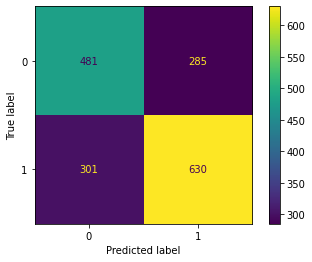

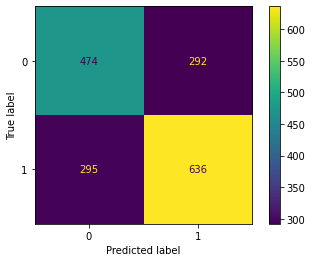

In [58]:
evals=CRF.evaluate(X_test,y_test,show_confusion_matrix=True)

In [59]:
(267+315)/(499+616+267+315), (284+294)/(499+616+267+315)

(0.34295816146140246, 0.34060106069534474)

In [60]:
(331+263)/(556+547+331+263), (320+270)/(556+547+331+263)

(0.3500294637595757, 0.34767236299351795)